In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_trn=pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
df_o=pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')
df_s=pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
df_txn=pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/transactions.csv')
df_h=pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')
dfs=[df_trn,df_o,df_s,df_txn,df_h]
for df in dfs:
    print(f"DataFrame columns:")
    for column in df.columns:
        print(column)
    print()

DataFrame columns:
id
date
store_nbr
family
sales
onpromotion

DataFrame columns:
date
dcoilwtico

DataFrame columns:
store_nbr
city
state
type
cluster

DataFrame columns:
date
store_nbr
transactions

DataFrame columns:
date
type
locale
locale_name
description
transferred



In [2]:
for i in dfs:
    print('Shape')
    print(i.shape)

Shape
(3000888, 6)
Shape
(1218, 2)
Shape
(54, 5)
Shape
(83488, 3)
Shape
(350, 6)


In [3]:
df=pd.merge(df_trn,df_h,on='date',how='left')
df=pd.merge(df,df_o,on='date',how='left')
df=pd.merge(df,df_s,on='store_nbr',how='left')
display(df.head())

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13


In [4]:
df.describe()

,id,store_nbr,sales,onpromotion,dcoilwtico,cluster
count,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,2.099196e+06,3.054348e+06
mean,1.504277e+06,2.750000e+01,3.590209e+02,2.617480e+00,6.801587e+01,8.481481e+00
std,8.662610e+05,1.558579e+01,1.107286e+03,1.225494e+01,2.569134e+01,4.649735e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,1.000000e+00
25%,7.546768e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.641000e+01,4.000000e+00
50%,1.507572e+06,2.750000e+01,1.100000e+01,0.000000e+00,5.343000e+01,8.500000e+00
75%,2.255120e+06,4.100000e+01,1.960110e+02,0.000000e+00,9.581000e+01,1.300000e+01
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,1.700000e+01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   type_x       object 
 7   locale       object 
 8   locale_name  object 
 9   description  object 
 10  transferred  object 
 11  dcoilwtico   float64
 12  city         object 
 13  state        object 
 14  type_y       object 
 15  cluster      int64  
dtypes: float64(2), int64(4), object(10)
memory usage: 396.1+ MB


In [6]:
df['timestamp']=pd.to_datetime(df['date'])
df['year']=df['timestamp'].dt.year
df['year'].value_counts()

2016    670032
2014    659340
2013    657558
2015    655776
2017    411642
Name: year, dtype: int64

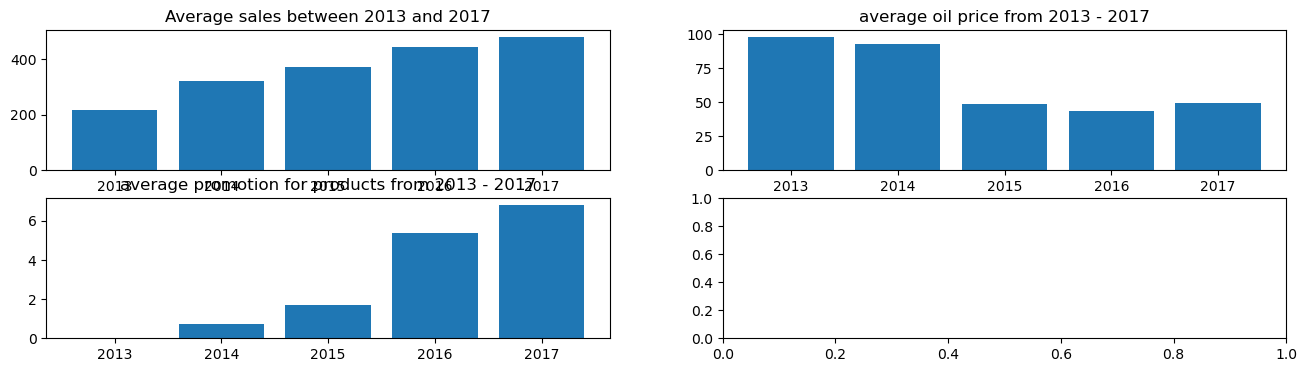

<Figure size 640x480 with 0 Axes>

In [7]:
fig,axes=plt.subplots(2,2,figsize=(16,4))

df['month']=df['timestamp'].dt.month

grouped_year=df.groupby(by='year')
grouped_year_sales=grouped_year['sales'].mean()
axes[0,0].bar(grouped_year_sales.index,grouped_year_sales)
axes[0,0].set_title('Average sales between 2013 and 2017')

grouped_year_oil = grouped_year["dcoilwtico"].mean()
axes[0,1].bar(grouped_year_oil.index, grouped_year_oil)
axes[0,1].set_title("average oil price from 2013 - 2017")

grouped_year_promotion = grouped_year["onpromotion"].mean()
axes[1,0].bar(grouped_year_promotion.index, grouped_year_promotion)
axes[1,0].set_title("average promotion for products from 2013 - 2017")
plt.show()
plt.tight_layout()

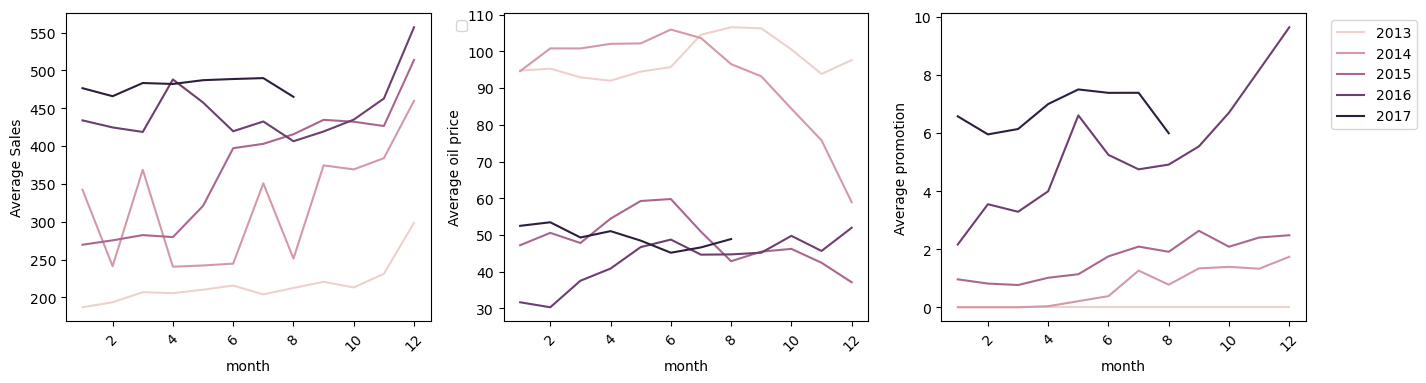

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

grouped_month_sales = df.groupby(["year", "month"])["sales"].mean().reset_index()
sns.lineplot(x = "month", y = "sales", hue = "year", data = grouped_month_sales, ax=axes[0], legend = False)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Average Sales')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

grouped_month_oil = df.groupby(["year", "month"])["dcoilwtico"].mean().reset_index()
grouped_month_oil["dcoilwtico"] = grouped_month_oil["dcoilwtico"].astype(float)
sns.lineplot(x = "month", y = "dcoilwtico", hue = "year", data = grouped_month_oil, ax=axes[1], legend = False)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Average oil price')

grouped_month_promotion = df.groupby(["year", "month"])["onpromotion"].mean().reset_index()
sns.lineplot(x = "month", y = "onpromotion", hue = "year", data = grouped_month_promotion, ax=axes[2])
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].set_ylabel('Average promotion')

plt.show()

In [9]:
state_group = df.groupby(["state"])
state_price = state_group["sales"].mean()
state_oil = state_group["dcoilwtico"].mean()
state_promotion = state_group["onpromotion"].mean()

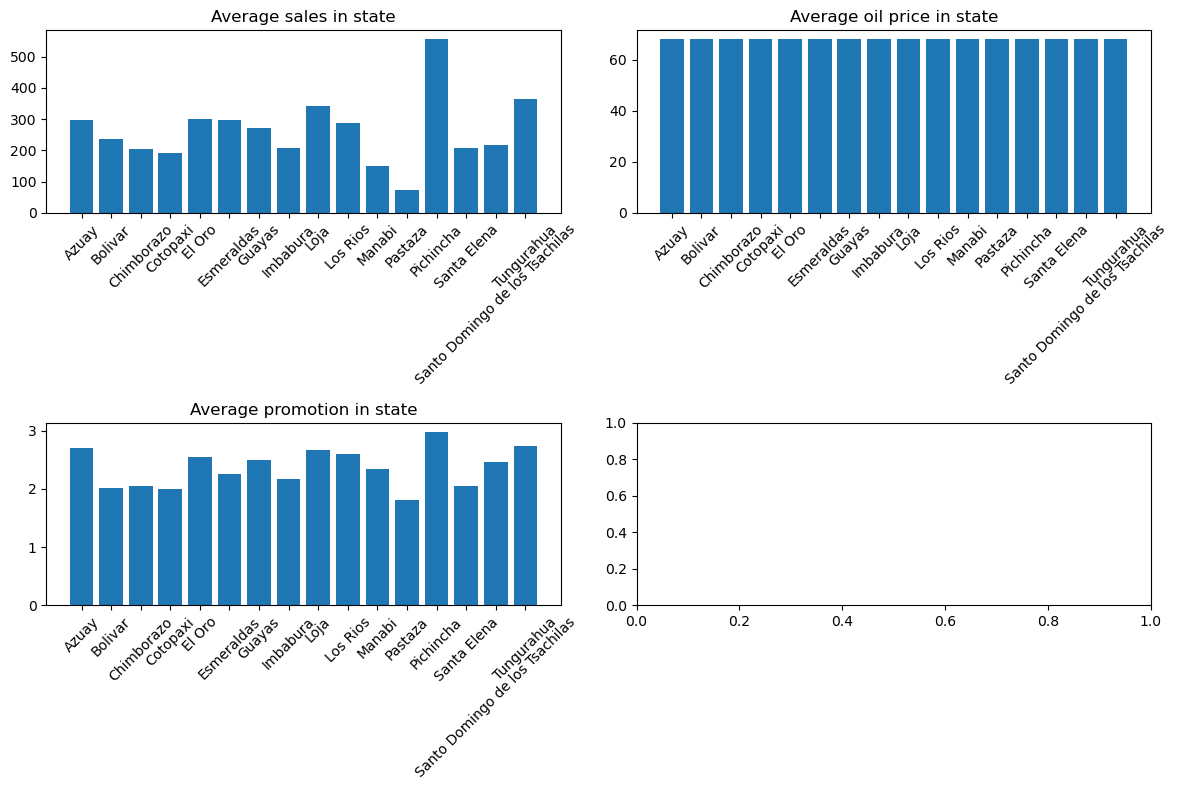

In [10]:
fig, axes = plt.subplots(2,2, figsize=(12, 8))

axes[0,0].bar(state_price.index, state_price)
axes[0,0].set_title("Average sales in state")
axes[0,0].tick_params(axis='x', rotation=45)

axes[0,1].bar(state_oil.index, state_oil)
axes[0,1].set_title("Average oil price in state")
axes[0,1].tick_params(axis='x', rotation=45)

axes[1,0].bar(state_promotion.index, state_promotion)
axes[1,0].set_title("Average promotion in state")
axes[1,0].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [11]:
import statsmodels.api as sm
import matplotlib

grouped_data=df.groupby('timestamp')
time_series = grouped_data[["sales", "dcoilwtico"]].mean().reset_index()
time_series_copy = time_series.set_index("timestamp")

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


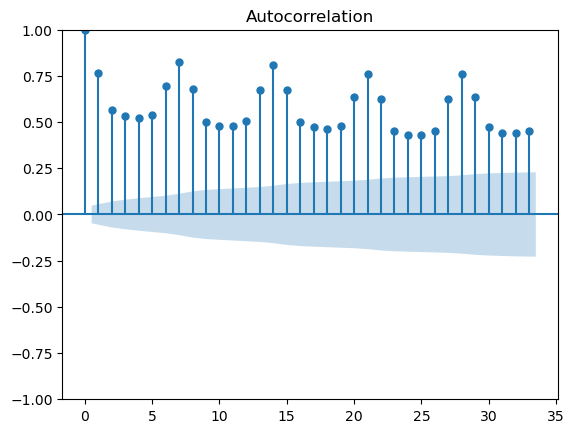

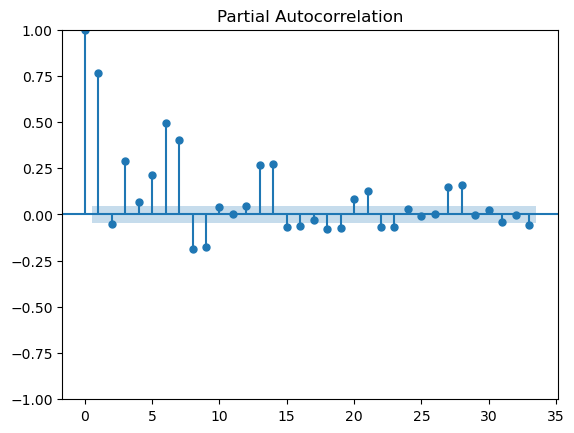

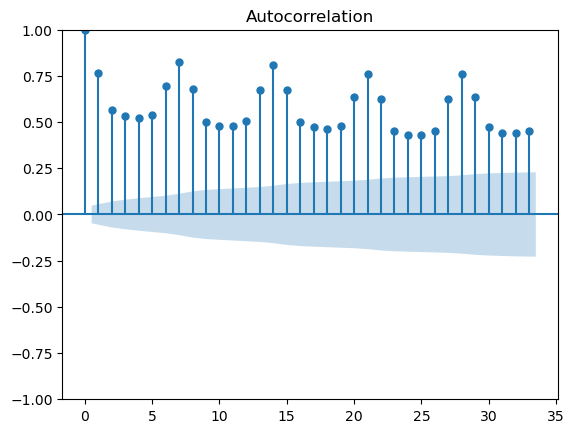

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
sales_data = time_series_copy["sales"].asfreq("D")
sales_data=sales_data.fillna(method='ffill')
plot_pacf(sales_data, alpha=0.05,use_vlines=True, title="Partial Autocorrelation")
plot_acf(sales_data, title="Autocorrelation")

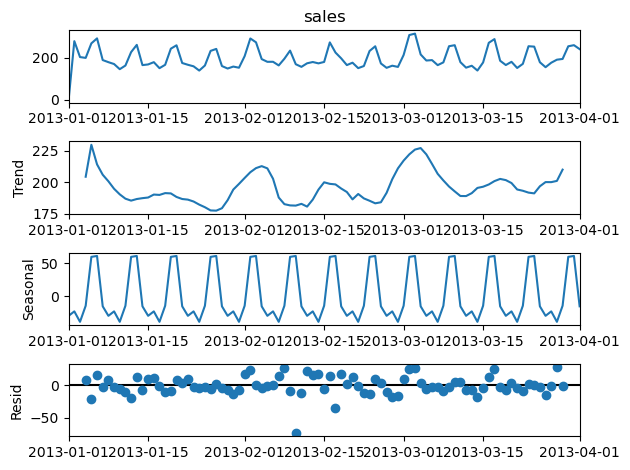

In [13]:
decomposition = sm.tsa.seasonal_decompose(sales_data['2013-01-01':'2013-04-01'], model = "additive")
fig = decomposition.plot()
plt.show()

In [14]:
sales_data.head()

timestamp
2013-01-01      1.409438
2013-01-02    278.390807
2013-01-03    202.840197
2013-01-04    198.911154
2013-01-05    267.873244
Freq: D, Name: sales, dtype: float64

<Axes: >

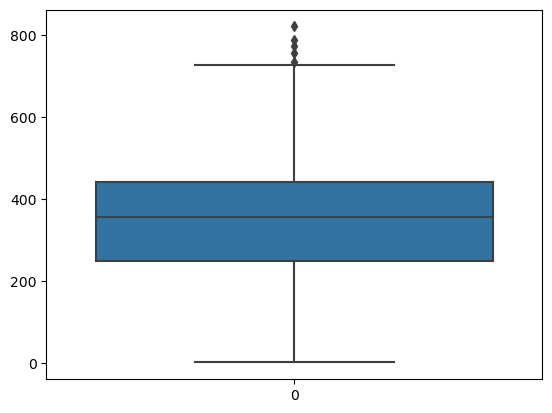

In [15]:

sns.boxplot(sales_data)

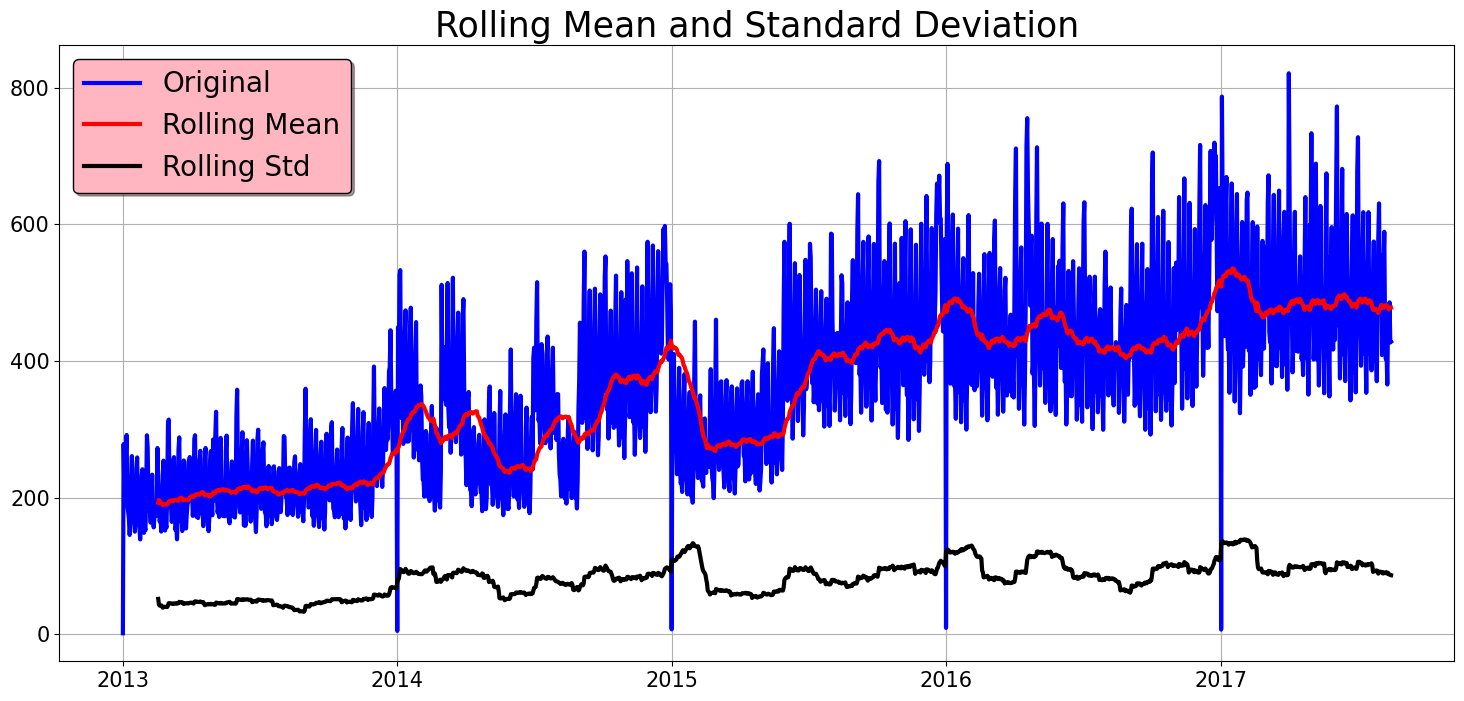

Results of Dickey-Fuller Test
Test Statistics                  -2.623339
p-value                           0.088269
No. of lags used                 22.000000
Number of observations used    1665.000000
critical value (1%)              -3.434284
critical value (5%)              -2.863277
critical value (10%)             -2.567695
dtype: float64


In [16]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    
    # Plot rolling statistics
    plt.figure(figsize=(18, 8))  # Reverted back to plt
    plt.grid('both')
    plt.plot(timeseries, color='blue', label='Original', linewidth=3)
    plt.plot(rolmean, color='red', label='Rolling Mean', linewidth=3)
    plt.plot(rolstd, color='black', label='Rolling Std', linewidth=3)
    plt.legend(loc='best', fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')
    plt.title('Rolling Mean and Standard Deviation', fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show(block=False)
    
    print("Results of Dickey-Fuller Test")
    adft = adfuller(timeseries, autolag='AIC')
    # we manually write what values does it explain using a for loop
    output = pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
    for key, values in adft[4].items():
        output['critical value (%s)' % key] = values
    print(output)

test_stationarity(sales_data)


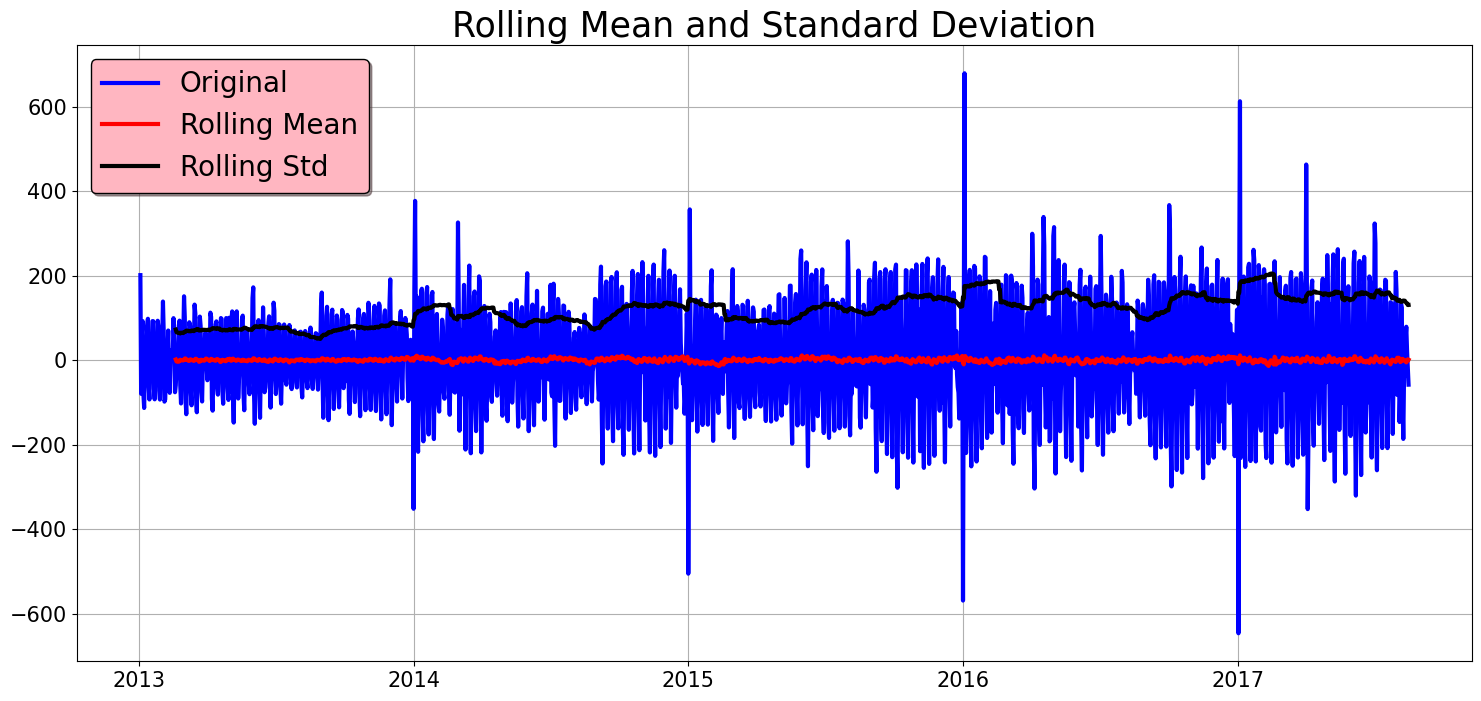

Results of Dickey-Fuller Test
Test Statistics               -1.305268e+01
p-value                        2.126002e-24
No. of lags used               2.500000e+01
Number of observations used    1.660000e+03
critical value (1%)           -3.434295e+00
critical value (5%)           -2.863283e+00
critical value (10%)          -2.567698e+00
dtype: float64


In [17]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

sales_data2 = sales_data.diff(2).dropna()
test_stationarity(sales_data2)

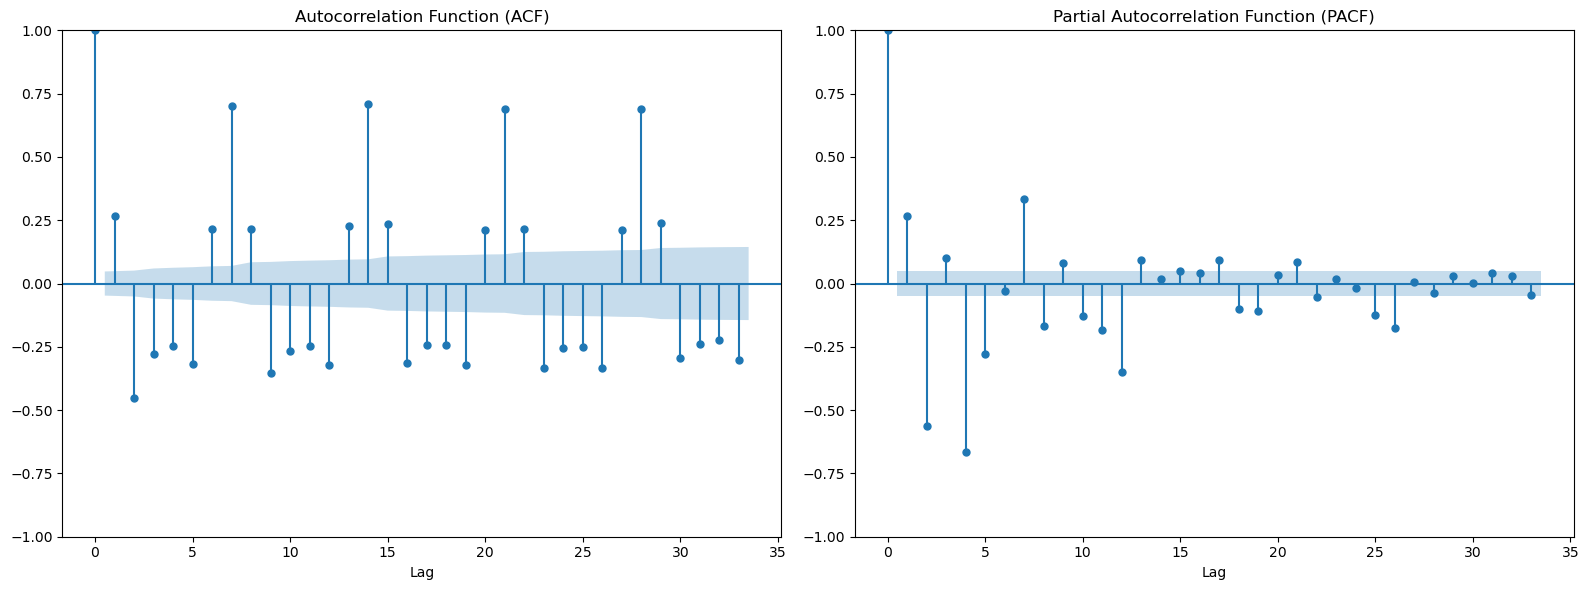

In [18]:
def plot_pacf_acf(series):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16, 6))
    plot_acf(series, ax=ax[0])  # Use ax[0] for ACF plot
    ax[0].set(xlabel='Lag', title='Autocorrelation Function (ACF)')

    plot_pacf(series, ax=ax[1],method='ywm')  # Use ax[1] for PACF plot
    ax[1].set(xlabel='Lag', title='Partial Autocorrelation Function (PACF)')
    plt.tight_layout()
    plt.show()
    
plot_pacf_acf(sales_data2)

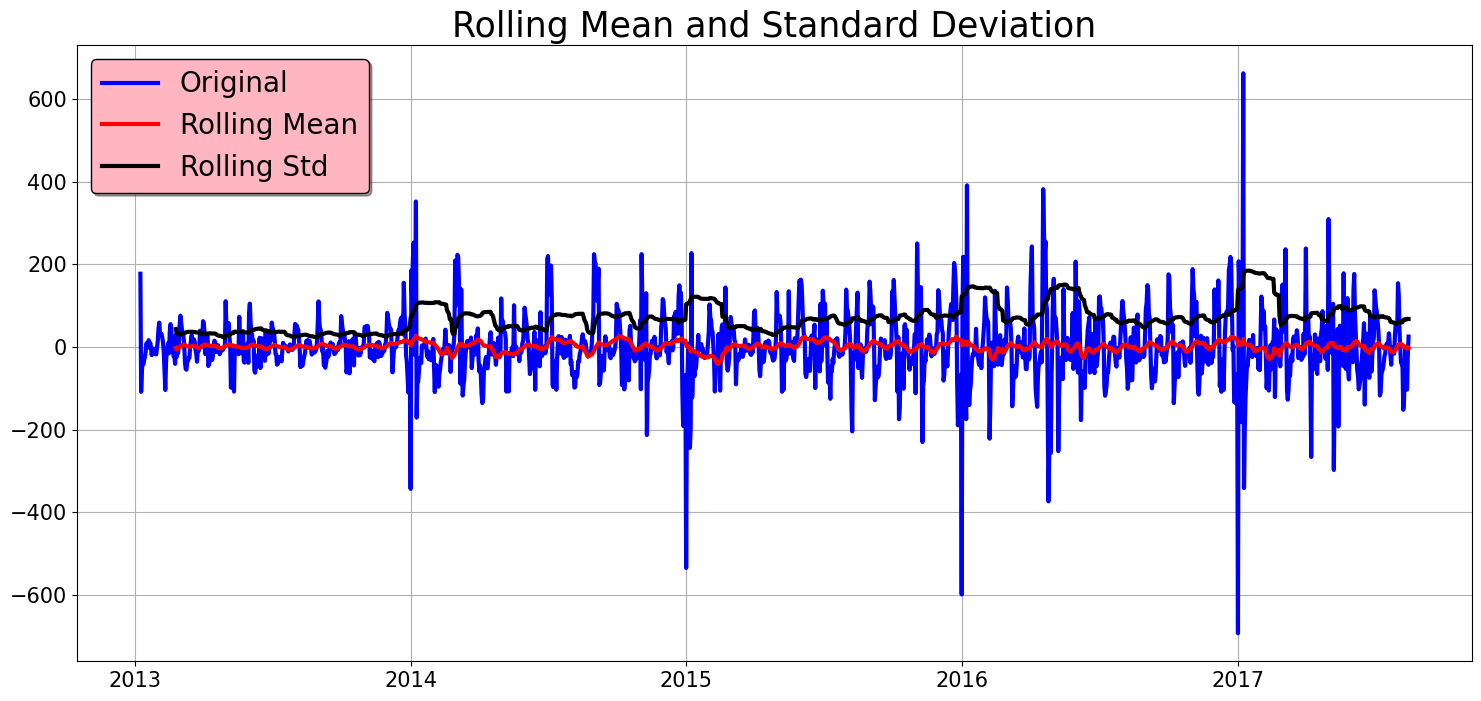

Results of Dickey-Fuller Test
Test Statistics               -1.110135e+01
p-value                        3.858216e-20
No. of lags used               2.300000e+01
Number of observations used    1.657000e+03
critical value (1%)           -3.434303e+00
critical value (5%)           -2.863286e+00
critical value (10%)          -2.567699e+00
dtype: float64


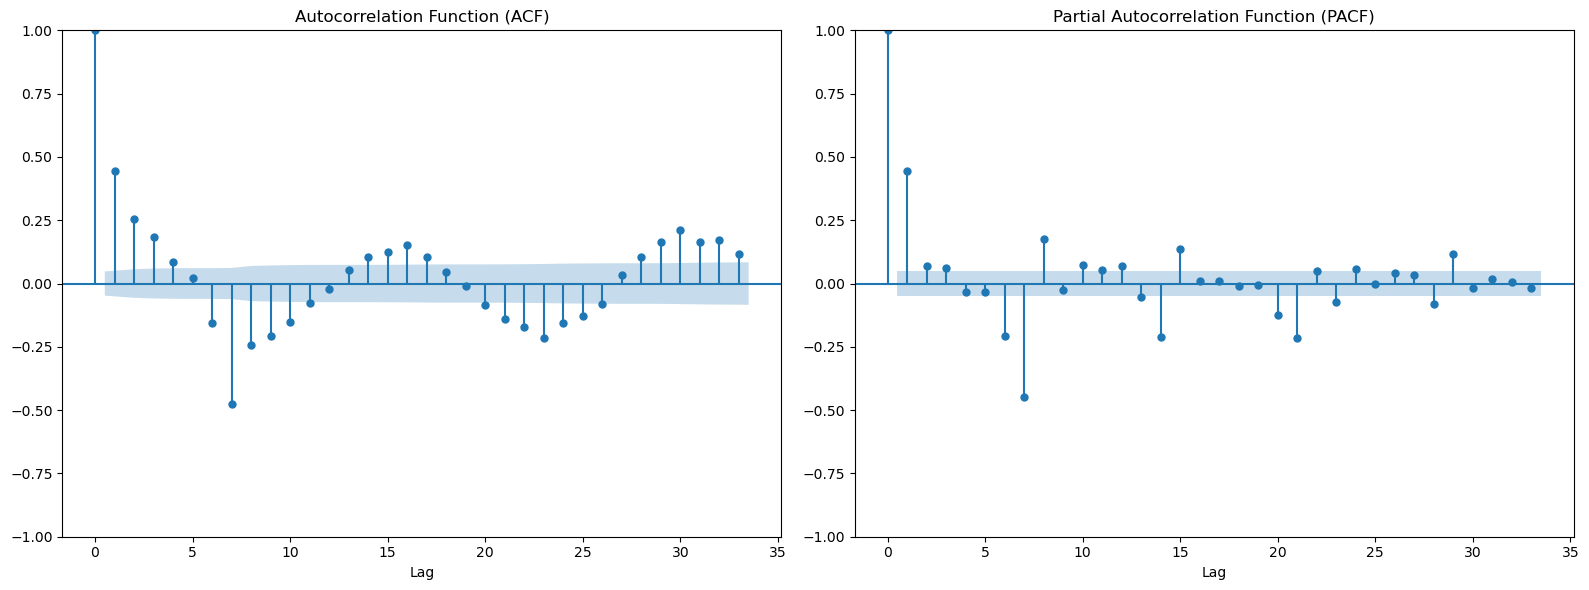

In [19]:
sales_data7=sales_data.diff(7).dropna()
test_stationarity(sales_data7)
plot_pacf_acf(sales_data7)

In [20]:
from datetime import datetime,timedelta
train_data=sales_data[:datetime(2016,1,1)]
test_data=sales_data[datetime(2016,1,1)+timedelta(days=1):]
train_data

timestamp
2013-01-01      1.409438
2013-01-02    278.390807
2013-01-03    202.840197
2013-01-04    198.911154
2013-01-05    267.873244
                 ...    
2015-12-28    443.145293
2015-12-29    488.643112
2015-12-30    578.026788
2015-12-31    541.325220
2016-01-01      9.221882
Freq: D, Name: sales, Length: 1096, dtype: float64

In [21]:
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')
model=sm.tsa.ARIMA(sales_data,order=(0,2,6),seasonal_order=(3,2,0,7))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                            sales   No. Observations:                 1688
Model:             ARIMA(0, 2, 6)x(3, 2, [], 7)   Log Likelihood               -9531.616
Date:                          Fri, 30 Jun 2023   AIC                          19083.233
Time:                                  06:34:09   BIC                          19137.451
Sample:                              01-01-2013   HQIC                         19103.321
                                   - 08-15-2017                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.6060      0.033    -48.432      0.000      -1.671      -1.541
ma.L2          0.3997      0.034     11.708      0.000       0.333       0.467
ma.L3          0.1881      0.042      4.522      0.000       0.107       0.270
ma.L4         -0.0731      0.037     -1.964      0.049      -0.146      -0.000
ma.L5          0.0145      0.032      0.450      0.653      -0.049       0.078
ma.L6          0.0768      0.016      4.782      0.000       0.045       0.108
ar.S.L7       -1.1715      0.010   -112.484      0.000      -1.192      -1.151
ar.S.L14      -0.8432      0.021    -40.830      0.000      -0.884      -0.803
ar.S.L21      -0.3930      0.015    -26.714      0.000      -0.422      -0.364
sigma2      5114.8723    182.966     27.955      0.000    4756.266    5473.479
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):             19844.10
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               2.93   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
test_data=test_data.fillna(test_data.mean())
test_data

timestamp
2016-01-02    598.584414
2016-01-03    688.403883
2016-01-04    536.451670
2016-01-05    468.754455
2016-01-06    461.103062
                 ...    
2017-08-11    463.733851
2017-08-12    444.798280
2017-08-13    485.768618
2017-08-14    427.004717
2017-08-15    427.980884
Freq: D, Name: sales, Length: 592, dtype: float64

In [23]:
pred=model_fit.predict(start='2016-01-02',end='2017-08-15')
pred

timestamp
2016-01-02    342.723601
2016-01-03    499.797532
2016-01-04    548.638113
2016-01-05    595.134368
2016-01-06    657.569254
                 ...    
2017-08-11    446.832571
2017-08-12    543.893338
2017-08-13    556.991371
2017-08-14    428.215180
2017-08-15    445.697600
Freq: D, Name: predicted_mean, Length: 592, dtype: float64

In [24]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test_data,pred))
rmse

89.14911915278333

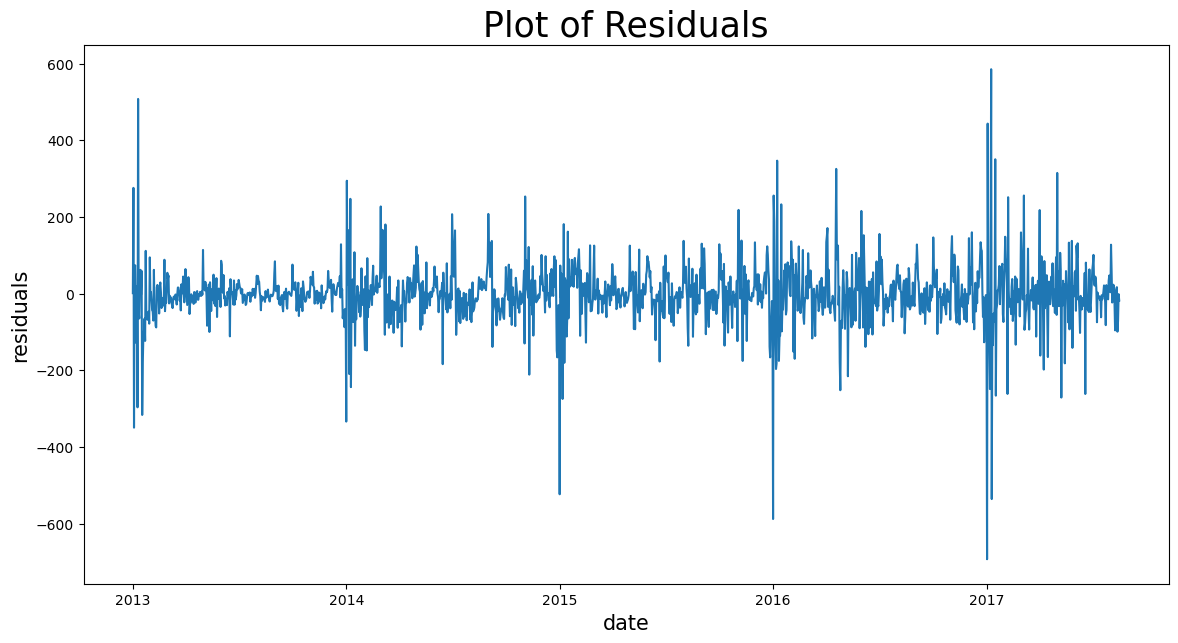

In [25]:
residuals=model_fit.resid
def resid_plot(residuals):
    plt.figure(figsize=(14,7))
    plt.plot(residuals)
    plt.xlabel('date',fontsize=15)
    plt.ylabel('residuals',fontsize=15)
    plt.title('Plot of Residuals',fontsize=25)
    plt.show()
    
resid_plot(residuals)

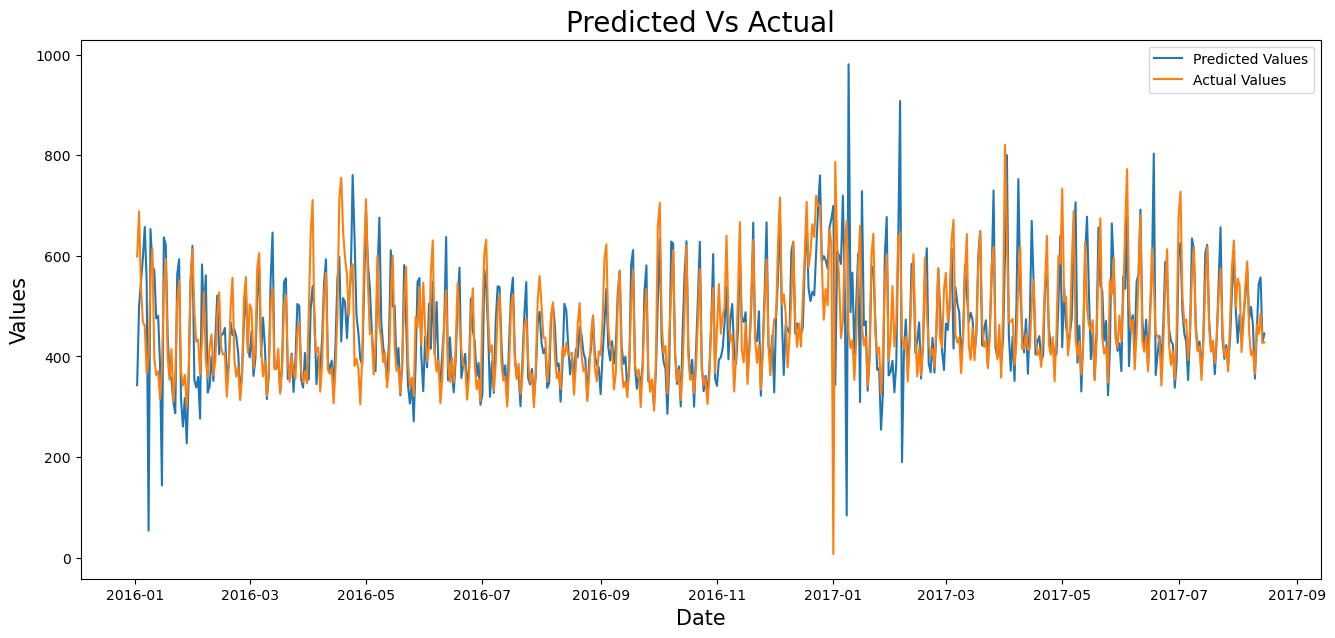

In [26]:
pred_data=pred
def result_plot(pred_data):
    fig,ax=plt.subplots(1, 1, figsize=(16, 7))
    ax.plot(pred_data,label='Predicted Values')
    ax.plot(test_data,label='Actual Values')
    ax.legend()
    ax.set_xlabel('Date',fontsize=15)
    ax.set_ylabel('Values',fontsize=15)
    ax.set_title('Predicted Vs Actual',fontsize=20)
    plt.show()
    
result_plot(pred_data)

In [27]:
import warnings
warnings.filterwarnings('ignore')
model2=sm.tsa.ARIMA(sales_data,order=(1,2,2),seasonal_order=(3,2,0,7))
model2_fit=model.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                            sales   No. Observations:                 1688
Model:             ARIMA(0, 2, 6)x(3, 2, [], 7)   Log Likelihood               -9531.616
Date:                          Fri, 30 Jun 2023   AIC                          19083.233
Time:                                  06:35:42   BIC                          19137.451
Sample:                              01-01-2013   HQIC                         19103.321
                                   - 08-15-2017                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.6060      0.033    -48.432      0.000      -1.671      -1.541
ma.L2          0.3997      0.034     11.708      0.000       0.333       0.467
ma.L3          0.1881      0.042      4.522      0.000       0.107       0.270
ma.L4         -0.0731      0.037     -1.964      0.049      -0.146      -0.000
ma.L5          0.0145      0.032      0.450      0.653      -0.049       0.078
ma.L6          0.0768      0.016      4.782      0.000       0.045       0.108
ar.S.L7       -1.1715      0.010   -112.484      0.000      -1.192      -1.151
ar.S.L14      -0.8432      0.021    -40.830      0.000      -0.884      -0.803
ar.S.L21      -0.3930      0.015    -26.714      0.000      -0.422      -0.364
sigma2      5114.8723    182.966     27.955      0.000    4756.266    5473.479
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):             19844.10
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               2.93   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
test_data.index

DatetimeIndex(['2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05',
               '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-09',
               '2016-01-10', '2016-01-11',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='timestamp', length=592, freq='D')

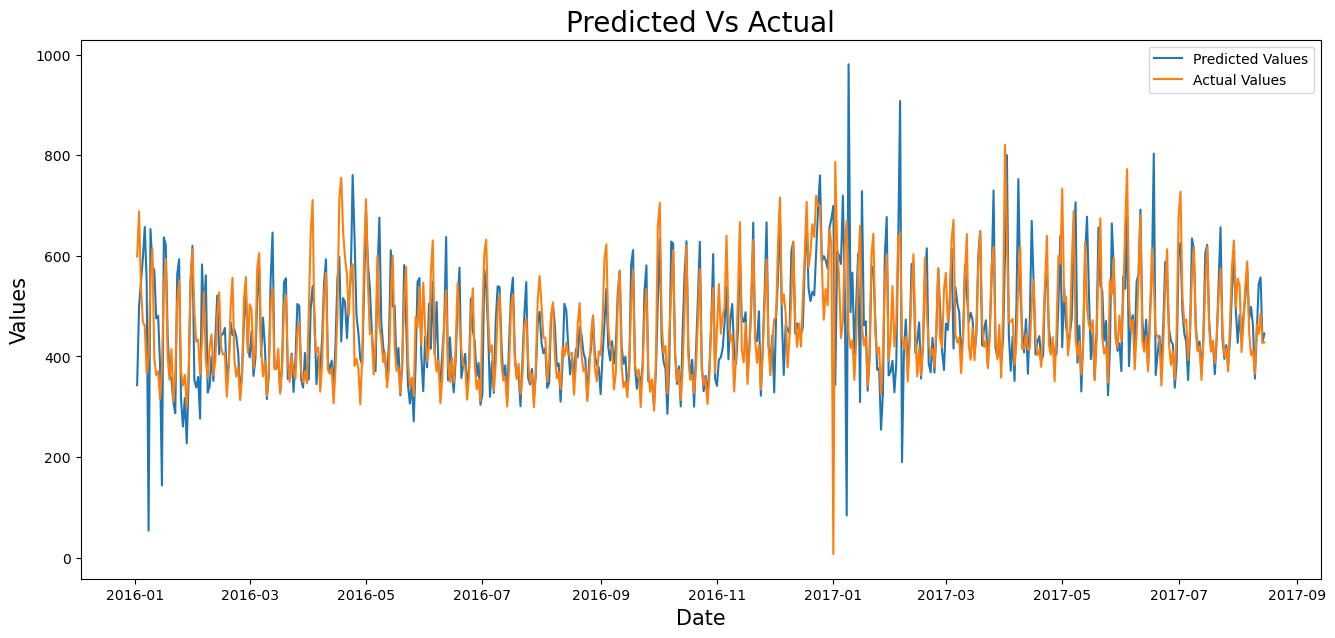

In [29]:
pred2=model2_fit.predict(start=test_data.index.min(),end=test_data.index.max())
result_plot(pred2)

In [30]:
rmse=np.sqrt(mean_squared_error(test_data,pred2))
rmse

89.14911915278333

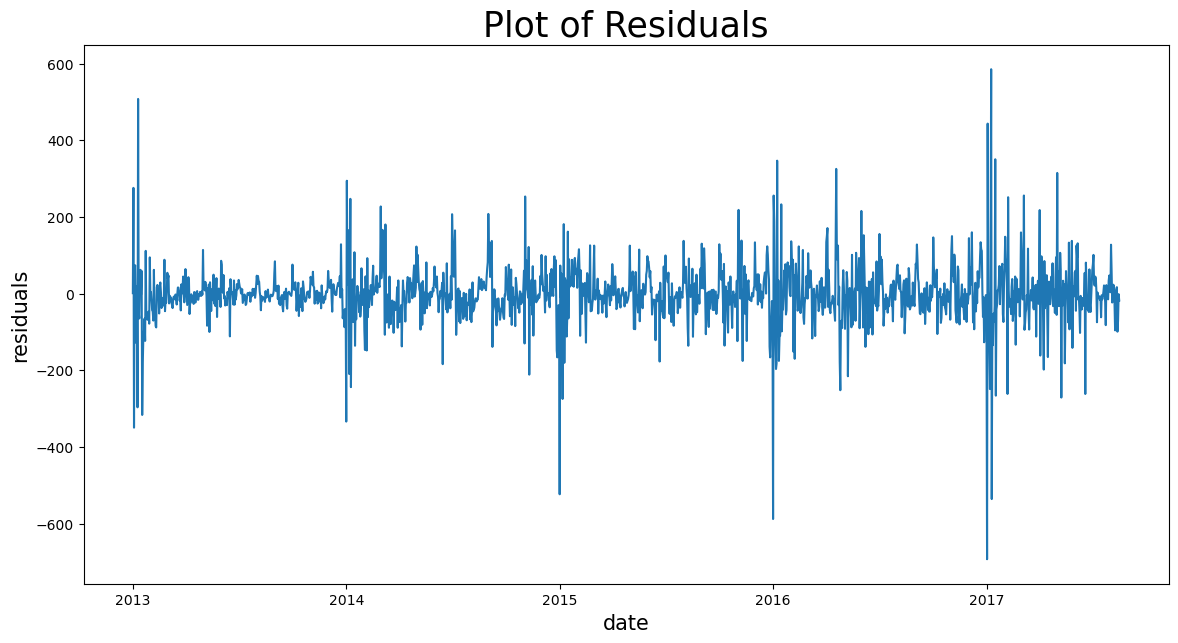

In [31]:
residuals2=model2_fit.resid
plt.figure(figsize=(14,7))
plt.plot(residuals2)
plt.xlabel('date',fontsize=15)
plt.ylabel('residuals',fontsize=15)
plt.title('Plot of Residuals',fontsize=25)
plt.show()

In [32]:
test= pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [33]:
test['date']

0        2017-08-16
1        2017-08-16
2        2017-08-16
3        2017-08-16
4        2017-08-16
            ...    
28507    2017-08-31
28508    2017-08-31
28509    2017-08-31
28510    2017-08-31
28511    2017-08-31
Name: date, Length: 28512, dtype: object

In [34]:
prediction=model_fit.predict(start=test['date'].min(),end=test['date'].max()).reset_index()
prediction.columns=['date','sales']
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    16 non-null     datetime64[ns]
 1   sales   16 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 384.0 bytes


In [35]:
prediction

,date,sales
0,2017-08-16,445.519511
1,2017-08-17,381.736635
2,2017-08-18,475.946855
3,2017-08-19,464.403705
4,2017-08-20,497.494491
5,2017-08-21,430.789985
6,2017-08-22,438.996706
7,2017-08-23,447.275485
8,2017-08-24,375.215679
9,2017-08-25,482.790042


In [36]:
test["date"] = pd.to_datetime(test["date"])
submission = pd.merge(test, prediction, on="date", how = "left")

In [37]:
submission = submission[["id", "sales"]]

In [38]:
submission.to_csv('submission.csv',index=False)

In [39]:
res=pd.read_csv('/kaggle/working/submission.csv')
res

,id,sales
0,3000888,445.519511
1,3000889,445.519511
2,3000890,445.519511
3,3000891,445.519511
4,3000892,445.519511
...,...,...
28507,3029395,376.734942
28508,3029396,376.734942
28509,3029397,376.734942
28510,3029398,376.734942
